# Gabor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


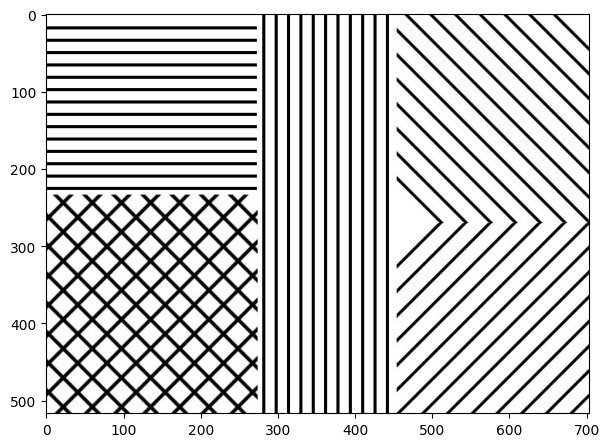

In [4]:
img_path = './'
#img_filename = 'Produtos_MatheusMazieiro.tiff'
img_filename = 'synthetic.jpg'

# Lê imagem e automaticamente converte para 1 canal de cinza
img = cv2.imread(img_path + img_filename, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[7,7])
plt.imshow(img, 'gray')

In [6]:
#Padding 
M, N = img.shape
img_padded = np.pad(img, ((0, M), (0, N)), 
                    mode='constant', constant_values=0)
P, Q = img_padded.shape


# Multiplicao por (-1)^(x+y)
mult_img = np.zeros([P, Q])
for x in range(P):
    for y in range(Q):
        mult_factor = (-1)**(x+y)
        mult_img[x, y] = img_padded[x, y] * mult_factor

# Converter imagem do domínio do espaço para o domínio da frequência
f = np.fft.fft2(mult_img)


In [7]:
#Definindo o filtro de gabor (trocar para log-gabor quando nescessario)
def gabor(lamda, theta, psi, sigma, gamma, M, N):

  (x,y) = np.meshgrid(np.arange(0,N), np.arange(0,M))

  # Rotation 
  xl =  (x-N/2) * np.cos(theta) + (y-M/2) * np.sin(theta)
  yl = -(x-N/2) * np.sin(theta) + (y-M/2) * np.cos(theta)

  gab_filter = np.cos((2*np.pi/lamda)*xl + psi)  
  gab_filter = gab_filter * np.exp((-1/(2*sigma**2))*(xl**2 + gamma**2 * yl**2))

  return gab_filter 

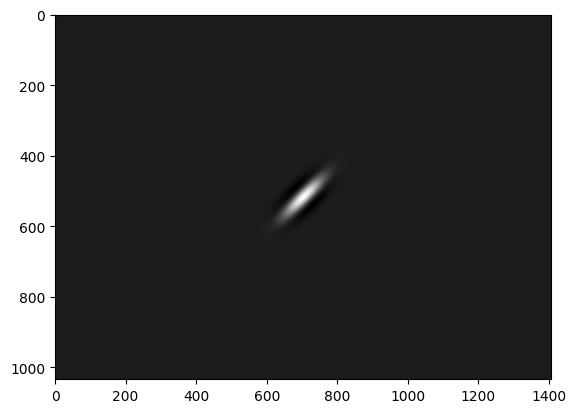

In [35]:
lb = 100
theta = 45 * (np.pi/180)
psi = 0
sg = 20
gm = .4

#Gera o filtro
gb = gabor(lb, theta, psi, sg, gm, P, Q)
plt.imshow(gb, cmap="gray")



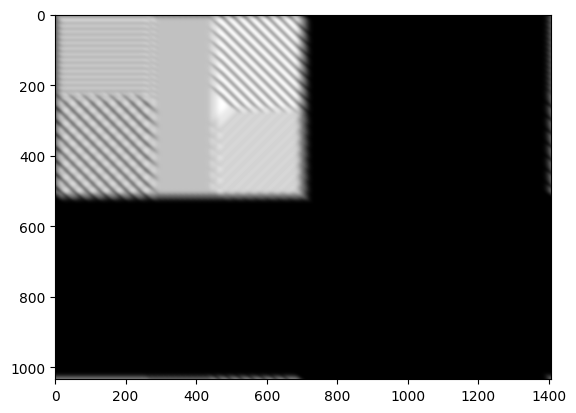

In [36]:
#G = H*F
Fimg_filtered = gb*f

#fft inversa
img_back = np.fft.ifft2(Fimg_filtered)

# Multiplicao por (-1)^(x+y)
mult_img_back = np.zeros([P, Q])
for x in range(P):
    for y in range(Q):
        mult_factor = (-1)**(x+y)
        mult_img_back[x, y] = img_back[x, y].real * mult_factor

plt.imshow(mult_img_back, cmap='gray')
plt.show()

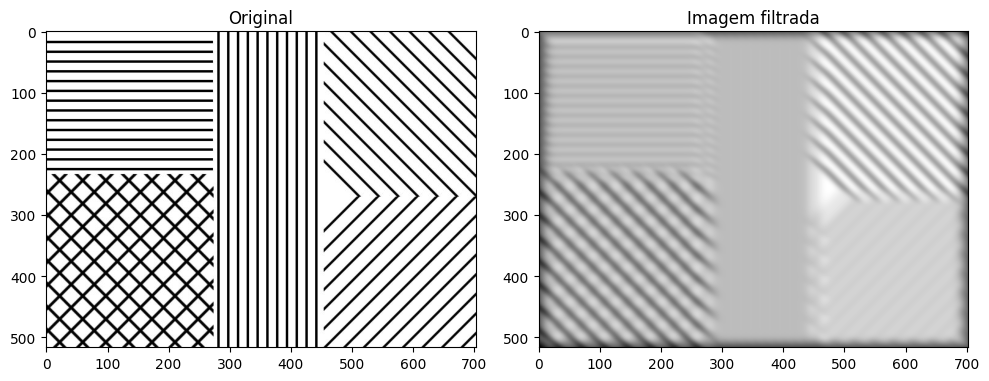

In [37]:
# Imagem do top-left quadrante 
final_img = mult_img_back[0:M, 0:N]

plt.figure(figsize=[10, 5.])

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(final_img, cmap='gray')
plt.title("Imagem filtrada")
plt.tight_layout()